In [59]:
import matplotlib.pyplot as plt
import numpy as npimport
import mysql.connector
from dotenv import load_dotenv
import os
import pandas as pd

In [44]:
def execute_sql(sql, *args): 
    load_dotenv()
    DB_HOST = os.getenv("DB_HOST")
    DB_USERNAME = os.getenv("DB_USERNAME")
    DB_PASSWORD = os.getenv("DB_PASSWORD")
    DB_DATABASE = os.getenv("DB_DATABASE")
    print(DB_HOST, DB_USERNAME, DB_PASSWORD)

    connection = mysql.connector.connect(
        host=DB_HOST,
        user=DB_USERNAME,
        password=DB_PASSWORD,
        database=DB_DATABASE,
        ssl_verify_identity=True,
        ssl_ca="/etc/ssl/certs/ca-certificates.crt"
    )

    print("Connected to the database", connection)
    cursor = connection.cursor(dictionary=True)
    cursor.execute(sql, args)
    data = cursor.fetchall()
    print(*data, sep="\n")
    cursor.close()
    return data

In [52]:
select_stmt0 = """
    SELECT * 
    FROM rising_stars 
    ORDER BY retrieved_time;
"""
select_stmt1 = """
    select fictions.title, fictions.description, rising_stars.placement
    FROM fictions JOIN rising_stars ON
    fictions.id = rising_stars.id
    AND fictions.retrieved_time = rising_stars.retrieved_time
    ORDER BY fictions.retrieved_time, rising_stars.placement;
"""
select_stmt2 = """
    SELECT retrieved_time, followers, views, pages
    FROM fictions
    WHERE fictions.id = %s;
"""
select_stmt2 = """
    SELECT title
    FROM fictions
    WHERE fictions.id = %s;
"""

data = execute_sql(select_stmt2, str(80952)) 

aws.connect.psdb.cloud q82f8e834ykd7qjba9l4 pscale_pw_JtmFyAUppHHWsxR9abMh5ighhkjJj1Hx9AptIHqD45
Connected to the database <mysql.connector.connection_cext.CMySQLConnection object at 0x73639ab65fa0>
{'retrieved_time': datetime.datetime(2024, 2, 3, 2, 0, 2), 'followers': 141, 'views': 1946, 'pages': 119}
{'retrieved_time': datetime.datetime(2024, 2, 3, 3, 0, 3), 'followers': 145, 'views': 2101, 'pages': 119}
{'retrieved_time': datetime.datetime(2024, 2, 3, 4, 0, 2), 'followers': 148, 'views': 2249, 'pages': 119}
{'retrieved_time': datetime.datetime(2024, 2, 3, 5, 0, 2), 'followers': 150, 'views': 2374, 'pages': 119}
{'retrieved_time': datetime.datetime(2024, 2, 3, 6, 0, 3), 'followers': 157, 'views': 2463, 'pages': 119}
{'retrieved_time': datetime.datetime(2024, 2, 3, 7, 0, 3), 'followers': 159, 'views': 2565, 'pages': 119}
{'retrieved_time': datetime.datetime(2024, 2, 3, 8, 0, 2), 'followers': 166, 'views': 2674, 'pages': 119}
{'retrieved_time': datetime.datetime(2024, 2, 3, 9, 0, 2), 

In [35]:
df = pd.DataFrame(data)
print(df)

          retrieved_time  views
0    2024-02-04 02:00:04  12856
1    2024-02-04 03:00:03  12985
2    2024-02-04 04:00:03  13089
3    2024-02-04 05:00:03  13220
4    2024-02-04 06:00:02  13318
...                  ...    ...
6245 2024-02-04 16:00:02   5176
6246 2024-02-04 17:00:03   5199
6247 2024-02-04 18:00:03   5227
6248 2024-02-04 19:00:02   5256
6249 2024-02-04 20:00:02   5416

[6250 rows x 2 columns]


aws.connect.psdb.cloud q82f8e834ykd7qjba9l4 pscale_pw_JtmFyAUppHHWsxR9abMh5ighhkjJj1Hx9AptIHqD45
Connected to the database <mysql.connector.connection_cext.CMySQLConnection object at 0x73638bf2acd0>
{'retrieved_time': datetime.datetime(2024, 1, 30, 15, 0, 3), 'followers': 366, 'views': 8799, 'pages': 70}
{'retrieved_time': datetime.datetime(2024, 1, 30, 16, 0, 3), 'followers': 369, 'views': 8906, 'pages': 70}
{'retrieved_time': datetime.datetime(2024, 1, 30, 17, 0, 3), 'followers': 371, 'views': 8995, 'pages': 70}
{'retrieved_time': datetime.datetime(2024, 1, 30, 18, 0, 3), 'followers': 372, 'views': 9081, 'pages': 70}
{'retrieved_time': datetime.datetime(2024, 1, 30, 19, 0, 3), 'followers': 372, 'views': 9201, 'pages': 70}
{'retrieved_time': datetime.datetime(2024, 1, 30, 20, 0, 3), 'followers': 375, 'views': 9351, 'pages': 75}
{'retrieved_time': datetime.datetime(2024, 1, 30, 21, 0, 3), 'followers': 378, 'views': 9608, 'pages': 75}
{'retrieved_time': datetime.datetime(2024, 1, 30, 22

(array([19753., 19754., 19755., 19756., 19757., 19758.]),
 [Text(19753.0, 0, '2024-01-31'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19755.0, 0, '2024-02-02'),
  Text(19756.0, 0, '2024-02-03'),
  Text(19757.0, 0, '2024-02-04'),
  Text(19758.0, 0, '2024-02-05')])

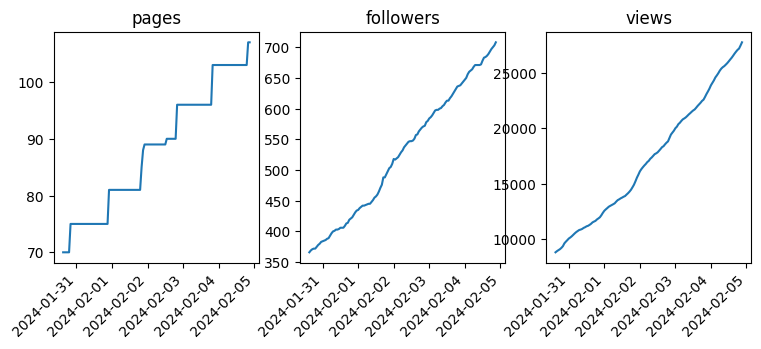

In [68]:
fiction_id = 80562

query = execute_sql(select_stmt2, str(fiction_id))
times = [line['retrieved_time'] for line in query]
pages = [line['pages'] for line in query]
followers = [line['followers'] for line in query]
views = [line['views'] for line in query]
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.plot(times, pages)
plt.title("pages")
plt.xticks(rotation=45, ha='right')

plt.subplot(132)
plt.plot(times, followers)
plt.title("followers")
plt.xticks(rotation=45, ha='right')

plt.subplot(133)
plt.plot(times, views)
plt.title("views")
plt.xticks(rotation=45, ha='right')
